# Figure Prep for What's New Word Doc

## Difference in v9 and v832 TAZ

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt

c:\Users\cday\Anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\cday\AppData\Local\Temp\ipykernel_5664\4197195985.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/late

In [2]:
# Define a function to generate CO_FIPS attribute based on CO_TAZID
def assign_fips(co_tazid):
    co_tazid_str = str(co_tazid)
    if co_tazid_str.startswith('30'):
        return '3'
    elif co_tazid_str.startswith('11'):
        return '11'
    elif co_tazid_str.startswith('35'):
        return '35'
    elif co_tazid_str.startswith('57'):
        return '57'
    elif co_tazid_str.startswith('49'):
        return '49'
    else:
        return None  # Handle other cases if needed

def plot_geo_data_by_fips(data_taz_new, data_taz_old, co_fips_value, line_color_new, line_color_old, line_width):    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Filter GeoDataFrames based on CO_FIPS value
    data_taz_new_filtered = data_taz_new.loc[data_taz_new['CO_FIPS'] == co_fips_value]
    data_taz_old_filtered = data_taz_old.loc[data_taz_old['CO_FIPS'] == co_fips_value]
    
    # Plot the filtered GeoDataFrames with different line colors and line width
    data_taz_new_filtered.plot(ax=ax, facecolor='none', edgecolor=line_color_new, linewidth=line_width)
    data_taz_old_filtered.plot(ax=ax, facecolor='none', edgecolor=line_color_old, linewidth=line_width)
    
    legend_ax = fig.add_axes([0.85, 0.5, 0.1, 0.1])
    legend_elements = [
        plt.Line2D([0], [0], color=line_color_new, linewidth=line_width, label='v9.0.0'),
        plt.Line2D([0], [0], color=line_color_old, linewidth=line_width, label='v8.3.2')
    ]
    legend_ax.legend(handles=legend_elements, loc='center')
    legend_ax.axis('off')
    
    # Display the plot
    plt.savefig("".join(['_pictures/doc-taz-',co_fips_value]), bbox_inches='tight')
    #plt.show()

In [11]:
# Read the GeoJSON files
data_taz_new = gpd.read_file(r'data\tazNew.geojson')
data_taz_old = gpd.read_file(r'data\tazOld.geojson')

# Apply the function to create the CO_FIPS attribute
data_taz_new['CO_FIPS'] = data_taz_new['CO_TAZID'].apply(assign_fips)
data_taz_old['CO_FIPS'] = data_taz_old['CO_TAZID'].apply(assign_fips)

# Set the line colors and line width
line_color_new = '#0B2842'
line_color_old = '#789d4b'
line_width = 0.5

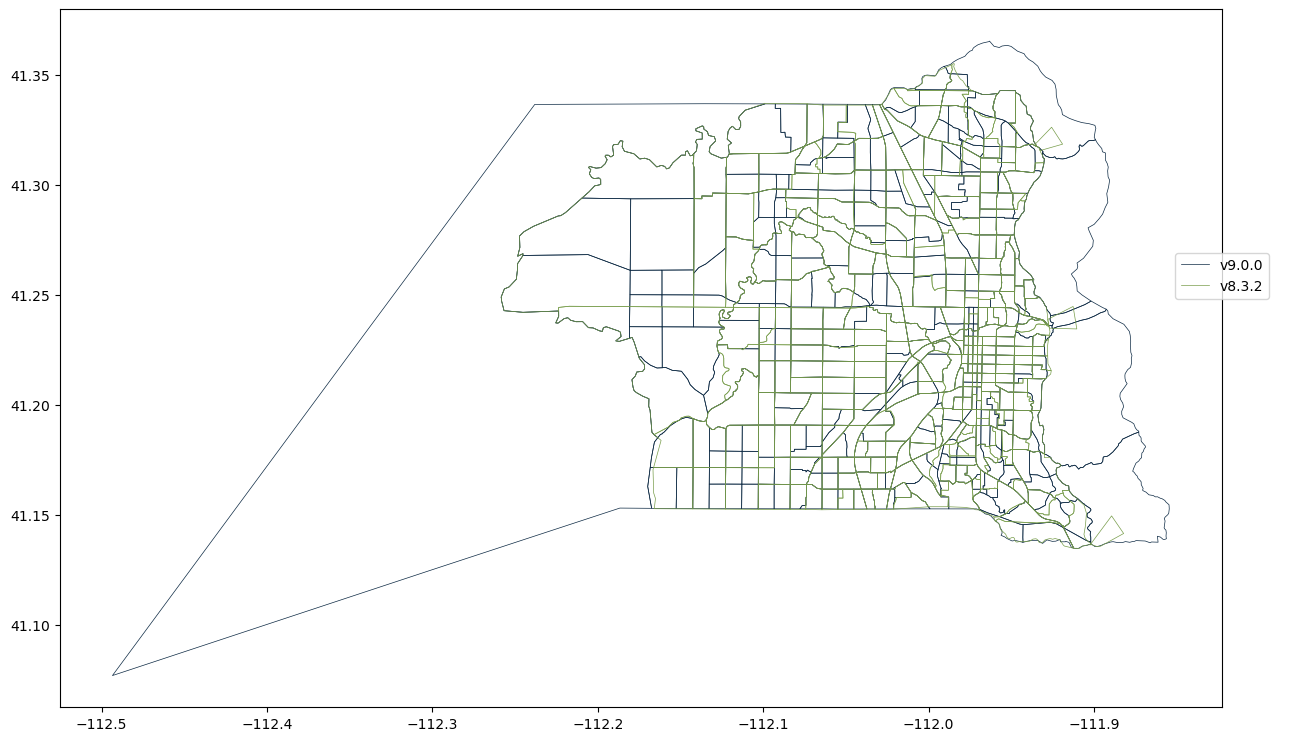

In [12]:
plot_geo_data_by_fips(data_taz_new, data_taz_old, '57', line_color_new, line_color_old, line_width)

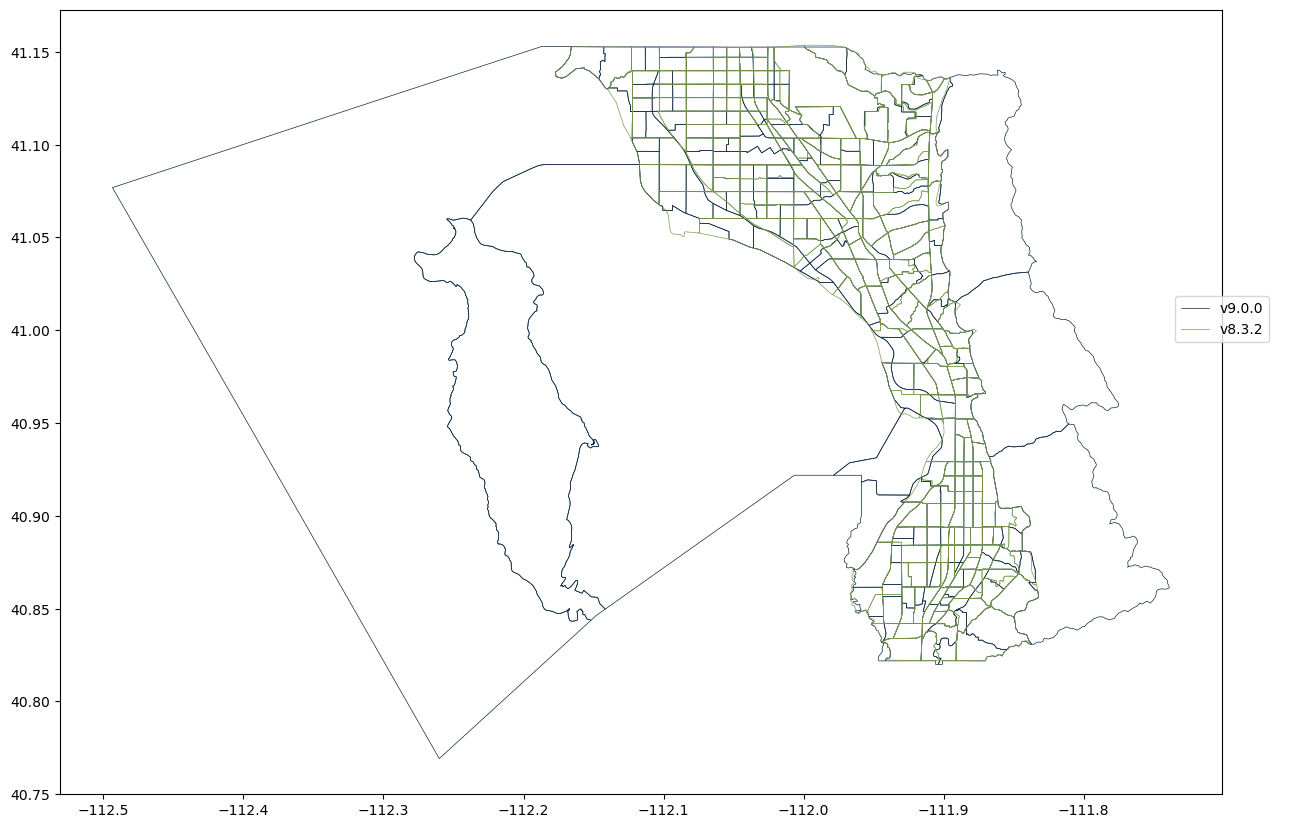

In [13]:
plot_geo_data_by_fips(data_taz_new, data_taz_old, '11', line_color_new, line_color_old, line_width)

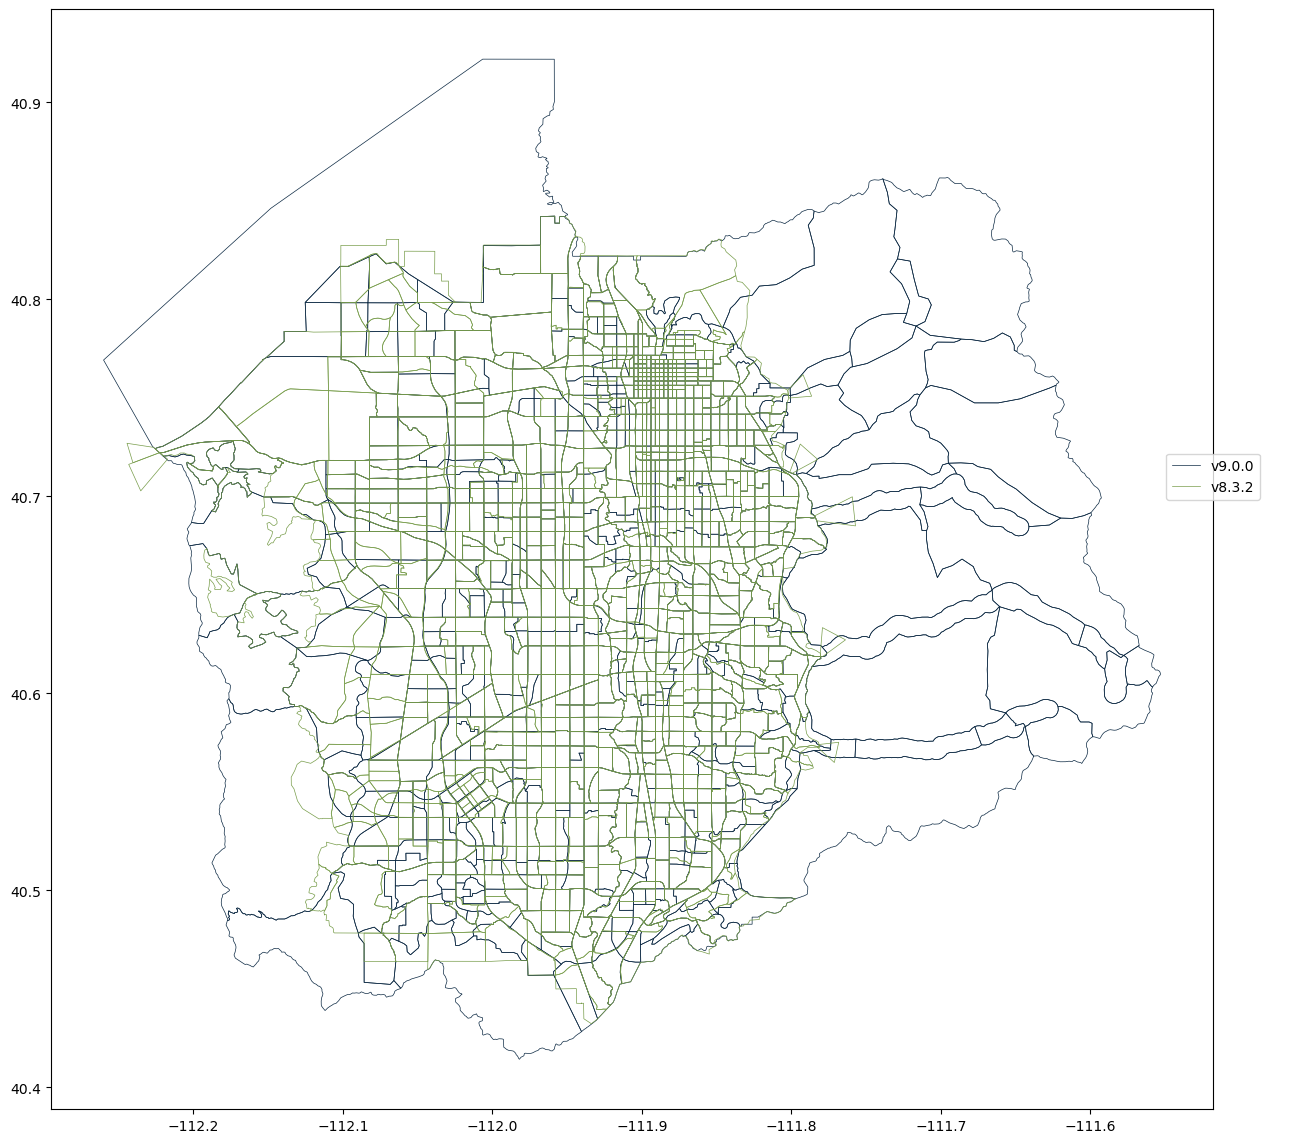

In [14]:
plot_geo_data_by_fips(data_taz_new, data_taz_old, '35', line_color_new, line_color_old, line_width)

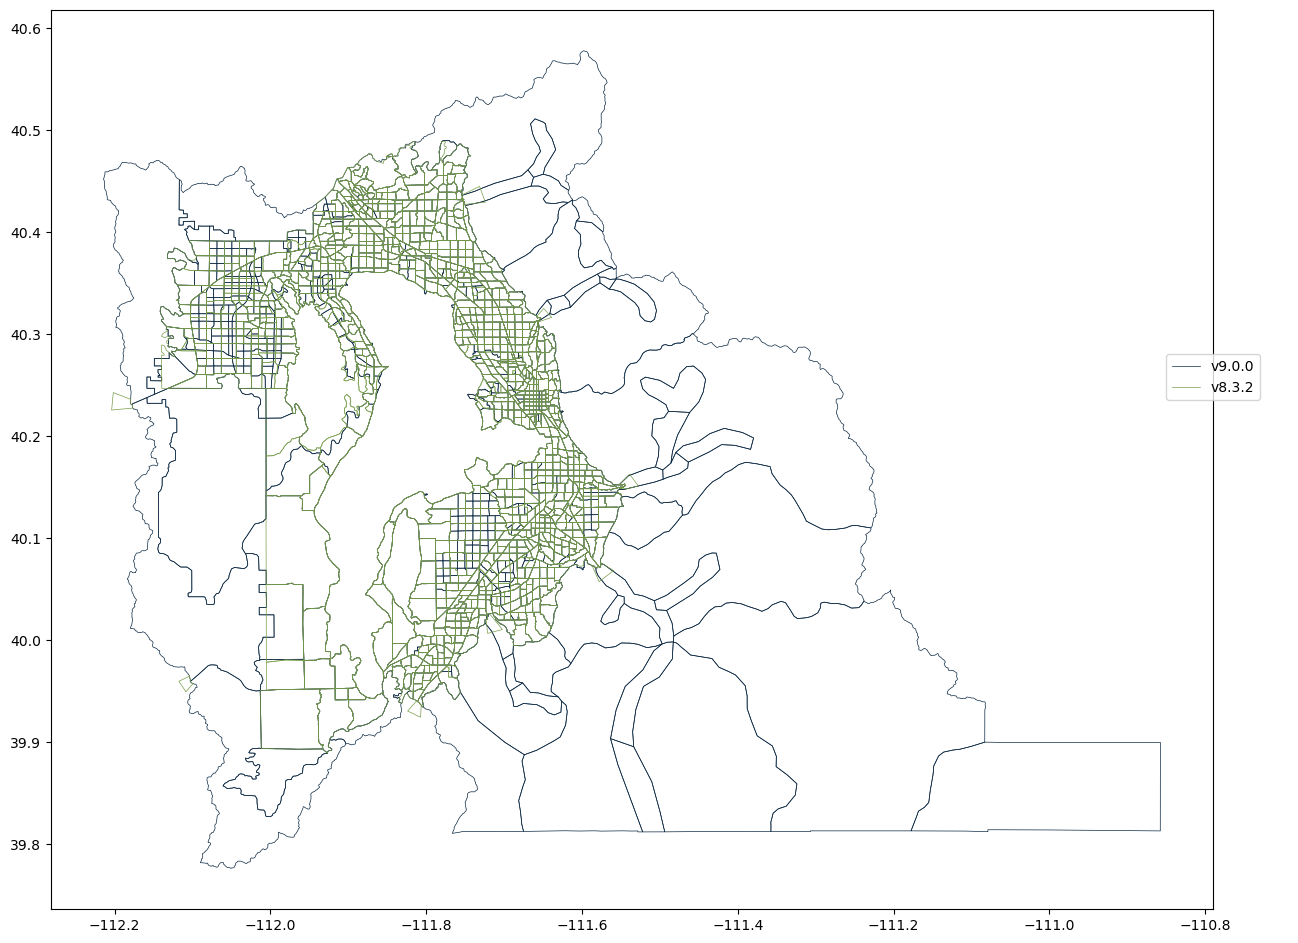

In [15]:
plot_geo_data_by_fips(data_taz_new, data_taz_old, '49', line_color_new, line_color_old, line_width)

## REMM Space

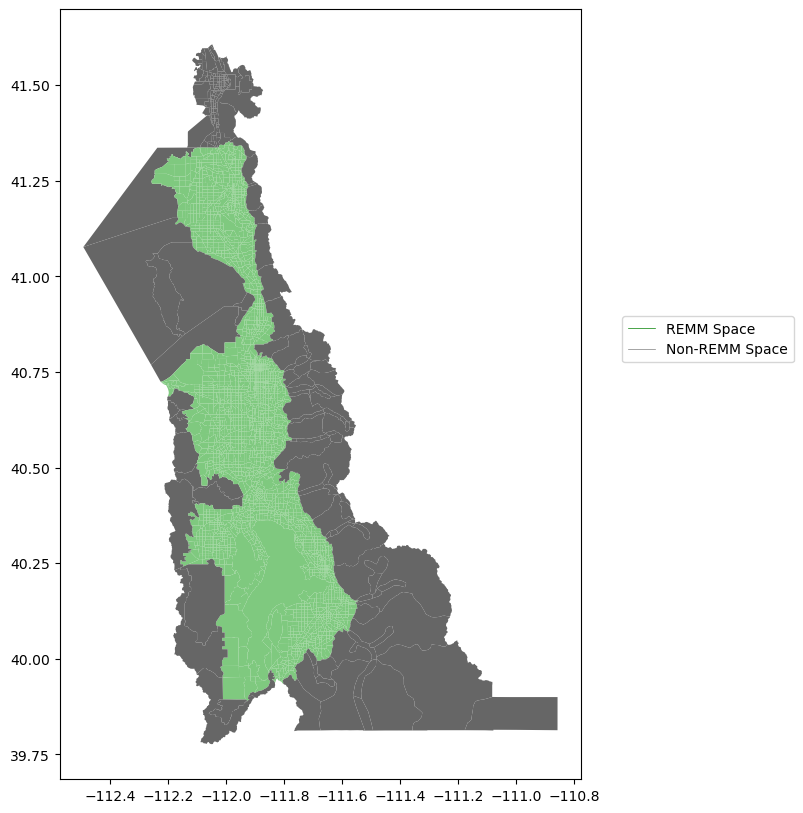

In [9]:
import matplotlib.colors as colors
data_taz_new = gpd.read_file(r'data\tazNew.geojson')
remm_values = data_taz_new['REMM'].astype(int)
cmap = 'Accent_r'

fig, ax = plt.subplots(figsize=(10, 10))
data_taz_new.plot(column=remm_values, cmap=cmap, linewidth=0.5, ax=ax)

legend_ax = fig.add_axes([0.85, 0.5, 0.1, 0.1]) 
legend_elements = [
    plt.Line2D([0], [0], color='green', linewidth=line_width, label='REMM Space'),
    plt.Line2D([0], [0], color='gray', linewidth=line_width, label='Non-REMM Space')
]
legend_ax.legend(handles=legend_elements, loc='center')
legend_ax.axis('off')

# Display the plot
#plt.show()
plt.savefig('_pictures/doc-remm', bbox_inches='tight')